## Open notebook in:
| Colab                                 |  Gradient                                                                                                                                         |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nicolepcx/transformers-the-definitive-guide/blob/master/CH06/CH06_inference_PixArt-Sigma-XL.ipynb)                                             | [![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com//github.com/Nicolepcx/transformers-the-definitive-guide/blob/main/CH06/CH06_inference_PixArt-Sigma-XL.ipynb)|             

# About this notebook

This notebook how you can generate high-quality images using the PixArt-Σ model, a state-of-the-art diffusion transformer for ultra-high-resolution image synthesis.

You will also monitor GPU memory usage throughout the process, using [PyTorch's memory functionality](https://pytorch.org/docs/stable/torch_cuda_memory.html#), and employ strategies like freezing parts of the model and cleaning up unused resources to further optimize memory consumption. By the end of this notebook, you will have a practical understanding of how to handle large-scale models on limited hardware, enabling you to generate high-quality images with reduced memory overhead.

#Installs

In [ ]:
!pip -q install transformers==4.42.4 \
                diffusers==0.30.0 \
                bitsandbytes==0.43.3 \
                ftfy==6.2.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 216.3 kB/s eta 0:00:00


#Imports

In [ ]:
import torch
from diffusers import PixArtSigmaPipeline


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

#Get Memory Summary

In [ ]:
print(
    torch.cuda.memory_summary()
)


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |
|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |
|---------------------------------------------------------------------------|
| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |
|       from large pool |      0 B   |      0 B   |      0 B   |

#Initialize Memory tracking

In [ ]:
torch.cuda.memory._record_memory_history()

# Run Inference

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

pipe = PixArtSigmaPipeline.from_pretrained(
    "PixArt-alpha/PixArt-Sigma-XL-2-1024-MS", torch_dtype=torch.float16
).to(device)

def to_giga_bytes(bytes):
    return bytes / (1024 ** 3)



model_index.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

(…)ext_encoder/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/9.06G [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/785 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.99G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
print(
    f"Max memory allocated: {to_giga_bytes(torch.cuda.max_memory_allocated())} GB"
)

print(
    f"Max memory reserved: {to_giga_bytes(torch.cuda.memory_reserved())} GB"
)

Max memory allocated: 12.054940700531006 GB
Max memory reserved: 12.23828125 GB


In [ ]:
prompt = "Cute animated tabby with big eyes"
image = pipe(prompt).images[0]
image.save("./tabby.png")

  0%|          | 0/20 [00:00<?, ?it/s]

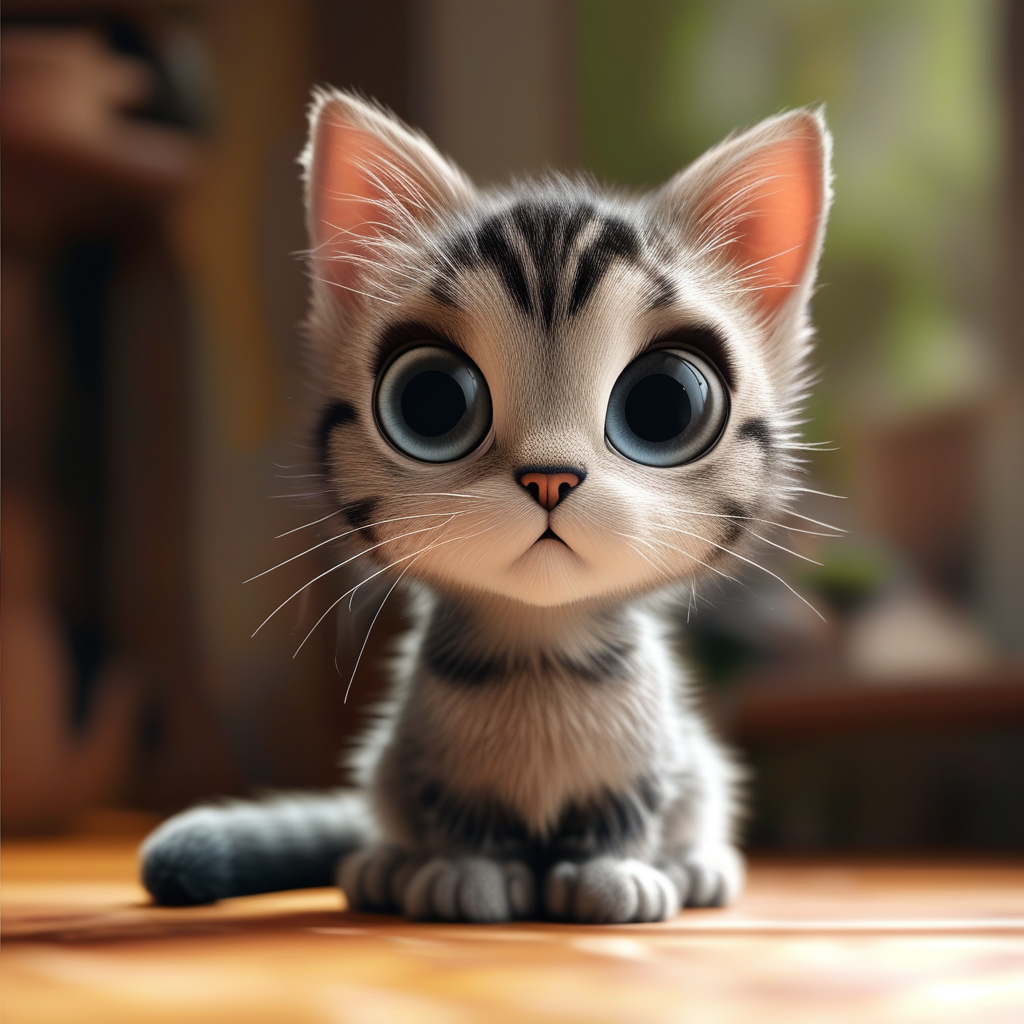

In [ ]:
image

In [ ]:
torch.cuda.memory._dump_snapshot("PixArtSigma.pickle")